<a href="https://colab.research.google.com/github/Hijas-10/flipkart-sales-analysis/blob/main/flipkart_pro_h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("flipkart_sales.csv")

In [ ]:
df

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1
...,...,...,...,...,...,...,...,...,...
995,ORD00996,Smartphone,Electronics,28995.81,3,86987.43,2025-01-13,COD,5.0
996,ORD00997,Perfume,Beauty,32799.51,2,65599.02,2024-12-18,Wallet,2.4
997,ORD00998,Face Cream,Beauty,40840.80,1,40840.80,2024-07-26,UPI,3.1
998,ORD00999,Cookware Set,Home & Kitchen,34741.79,4,138967.16,2024-10-02,Net Banking,3.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           1000 non-null   object 
 1   Product Name       1000 non-null   object 
 2   Category           1000 non-null   object 
 3   Price (INR)        1000 non-null   float64
 4   Quantity Sold      1000 non-null   int64  
 5   Total Sales (INR)  1000 non-null   float64
 6   Order Date         1000 non-null   object 
 7   Payment Method     1000 non-null   object 
 8   Customer Rating    1000 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


In [ ]:
#date split , months idth cheyya compare cheyya
#

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df["Category"].unique()

array(['Books', 'Clothing', 'Beauty', 'Electronics', 'Home & Kitchen'],
      dtype=object)

In [ ]:
#df["Order Date"] = df["Order Date"].str.replace("-","/")

In [ ]:
#creating new column months from Order Date

mon = [i.split("-")[1] for i in df["Order Date"]]
df["months"] = mon

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1000 non-null   int64  
 1   Order ID           1000 non-null   object 
 2   Product Name       1000 non-null   object 
 3   Category           1000 non-null   object 
 4   Price (INR)        1000 non-null   float64
 5   Quantity Sold      1000 non-null   int64  
 6   Total Sales (INR)  1000 non-null   float64
 7   Order Date         1000 non-null   object 
 8   Payment Method     1000 non-null   object 
 9   Customer Rating    1000 non-null   float64
 10  months             1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [ ]:
df["months"].unique()

array(['09', '12', '05', '11', '10', '07', '01', '03', '02', '04', '06',
       '08'], dtype=object)

In [ ]:
month_dict = {
    '09': 'September',
    '12': 'December',
    '05': 'May',
    '11': 'November',
    '10': 'October',
    '07': 'July',
    '01': 'January',
    '03': 'March',
    '02': 'February',
    '04': 'April',
    '06': 'June',
    '08': 'August'
}

df["months"] = df["months"].map(month_dict)


In [ ]:
df.drop(["index"],axis = 1,inplace = True)

In [ ]:
df["Payment Method"].unique()

array(['Debit Card', 'UPI', 'Wallet', 'COD', 'Credit Card', 'Net Banking'],
      dtype=object)

In [ ]:
#@title Most selled products
df["Product Name"].value_counts().sort_values()

#educational books , laptop and smartwatches are the most selled products

,count
Product Name,
Dress,29
Cookbook,29
Bedsheet,30
Shampoo,34
Hair Dryer,36
Self-Help Book,36
Mixer Grinder,36
Face Cream,38
Jacket,38


/tmp/ipython-input-207-2579536344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.countplot(x = 'Product Name',data = df,edgecolor = "black",palette = flipkart_yellow_palette )


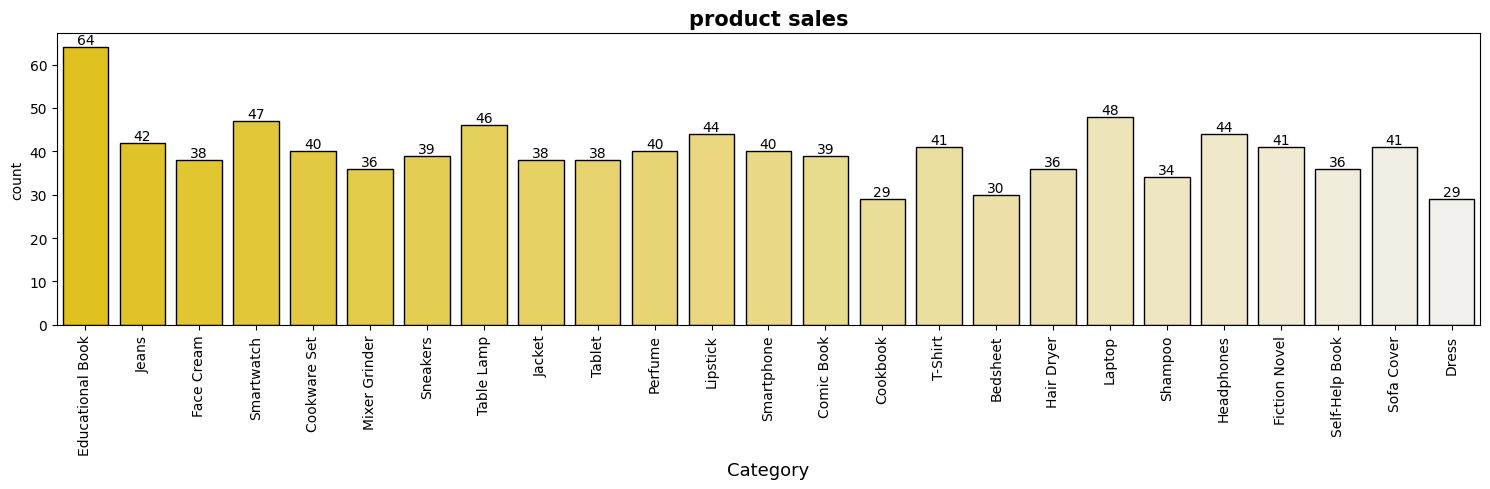

In [ ]:
plt.figure(figsize=(15,5))

flipkart_yellow_palette = sns.light_palette("#FFD700", n_colors=25, reverse=True)

b = sns.countplot(x = 'Product Name',data = df,edgecolor = "black",palette = flipkart_yellow_palette )
for i in b.containers:
  b.bar_label(i)
plt.xticks(rotation = 90)

plt.title("product sales", fontsize=15,weight = "bold")
plt.xlabel("Category",fontsize = 13)

plt.tight_layout()

plt.show()

In [ ]:
#@title which Category sells more
df.groupby("Category")["Quantity Sold"].sum().sort_values()
#electronics

,Quantity Sold
Category,
Home & Kitchen,579
Beauty,583
Clothing,609
Books,653
Electronics,673


/tmp/ipython-input-209-1352479246.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x = 'Category',y = "Quantity Sold",data = high,edgecolor = "black",palette = flipkart_yellow_palette )


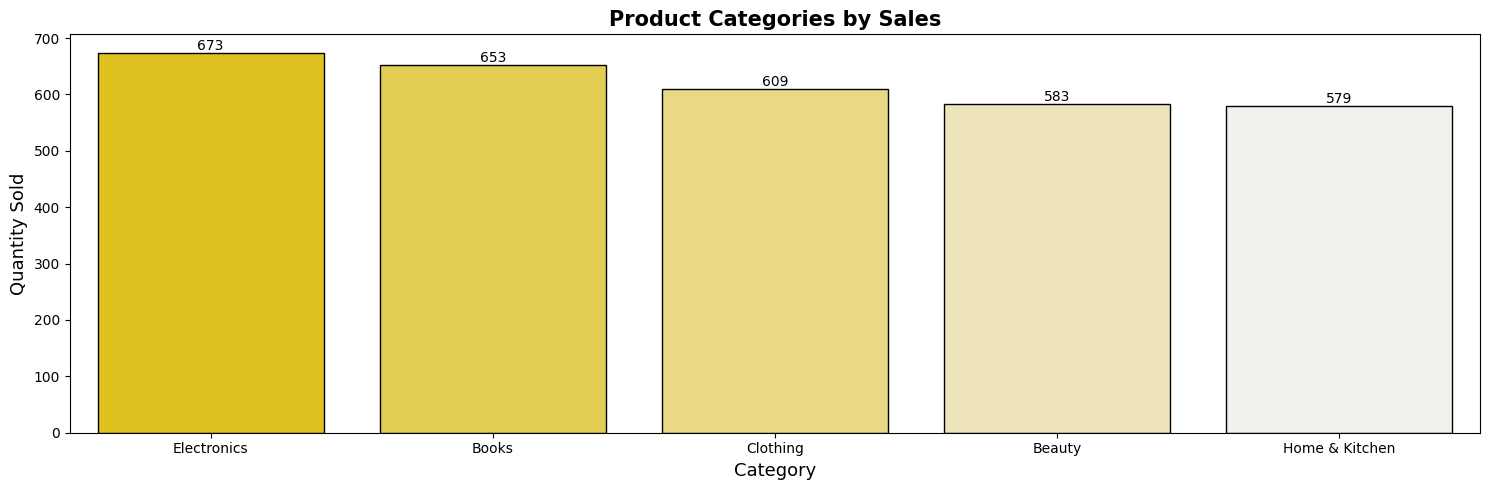

In [ ]:
plt.figure(figsize=(15,5))

flipkart_yellow_palette = sns.light_palette("#FFD700", n_colors=5, reverse=True)

high = df.groupby("Category",as_index=False)["Quantity Sold"].sum().sort_values(by="Quantity Sold",ascending=False)
b = sns.barplot(x = 'Category',y = "Quantity Sold",data = high,edgecolor = "black",palette = flipkart_yellow_palette )

for i in b.containers:
  b.bar_label(i)

plt.title("Product Categories by Sales", fontsize=15,weight = "bold")
plt.xlabel("Category",fontsize = 13)
plt.ylabel("Quantity Sold",fontsize = 13)

plt.tight_layout()

plt.show()

In [ ]:
#Total Amount of Transaction using diffrent mode of payments
df.groupby("Payment Method")["Total Sales (INR)"].sum().sort_values()

,Total Sales (INR)
Payment Method,
Credit Card,11155785.99
Debit Card,12142559.04
COD,12457136.55
UPI,12790919.48
Net Banking,13219947.52
Wallet,13446764.16


/tmp/ipython-input-211-686543285.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x = 'Payment Method',y = "Total Sales (INR)",data = high,edgecolor = "black",palette = flipkart_yellow_palette,estimator=np.sum)


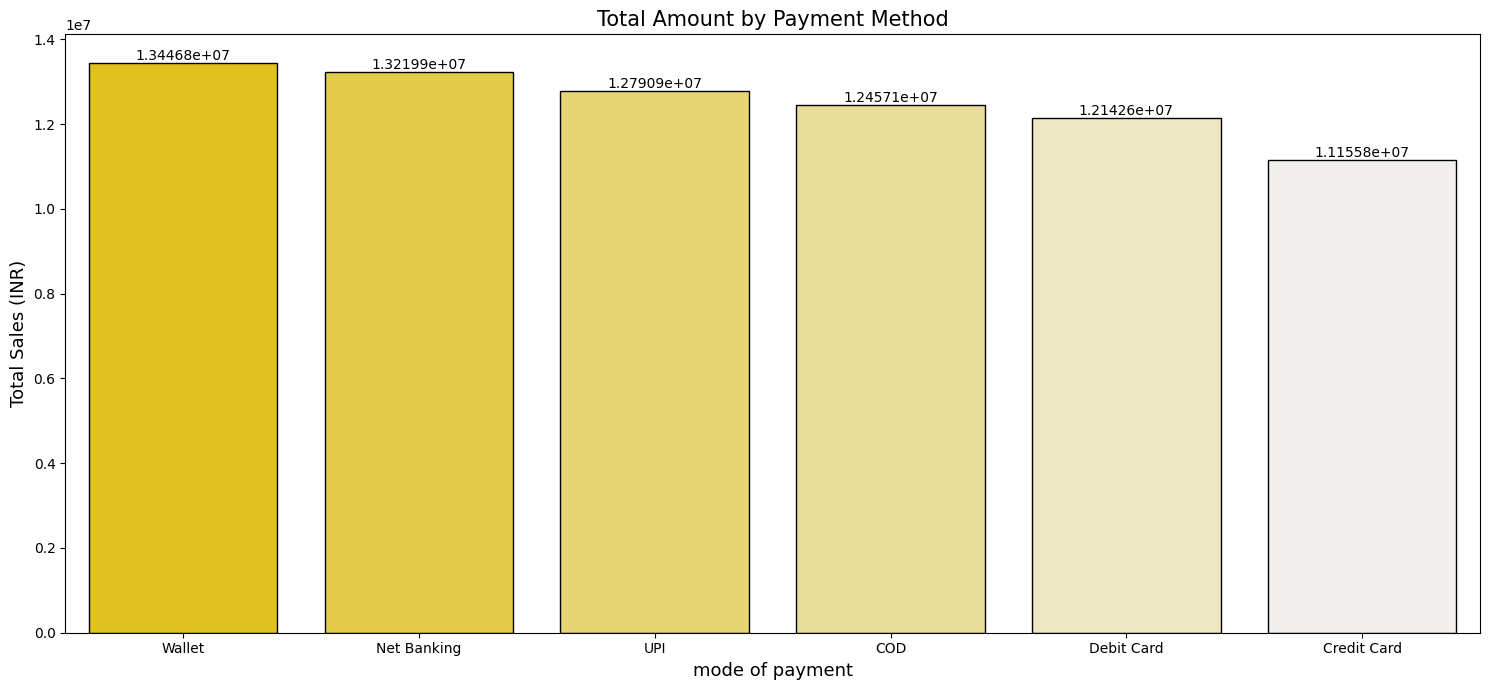

In [ ]:
plt.figure(figsize=(15,7))

flipkart_yellow_palette = sns.light_palette("#FFD700", n_colors=6, reverse=True)

high = df.groupby("Payment Method",as_index=False)["Total Sales (INR)"].sum().sort_values(by="Total Sales (INR)",ascending=False)
b = sns.barplot(x = 'Payment Method',y = "Total Sales (INR)",data = high,edgecolor = "black",palette = flipkart_yellow_palette,estimator=np.sum)

for i in b.containers:
  b.bar_label(i)

plt.title("Total Amount by Payment Method", fontsize=15)
plt.xlabel("mode of payment",fontsize = 13)
plt.ylabel("Total Sales (INR)",fontsize = 13)

plt.tight_layout()

plt.show()

In [ ]:
df

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating,months
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5,September
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9,December
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4,May
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2,November
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1,December
...,...,...,...,...,...,...,...,...,...,...
995,ORD00996,Smartphone,Electronics,28995.81,3,86987.43,2025-01-13,COD,5.0,January
996,ORD00997,Perfume,Beauty,32799.51,2,65599.02,2024-12-18,Wallet,2.4,December
997,ORD00998,Face Cream,Beauty,40840.80,1,40840.80,2024-07-26,UPI,3.1,July
998,ORD00999,Cookware Set,Home & Kitchen,34741.79,4,138967.16,2024-10-02,Net Banking,3.2,October


In [ ]:
#@title which months has Top sales
df.groupby("months")["Total Sales (INR)"].sum().sort_values()

,Total Sales (INR)
months,
June,4992364.75
February,5416573.21
August,5418893.98
November,5578535.08
October,5702923.37
September,6264222.31
December,6491639.99
March,6508879.04
May,6706004.97


/tmp/ipython-input-214-4012908029.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x = 'months',y = "Total Sales (INR)",data = high,edgecolor = "black",palette = flipkart_yellow_palette,estimator=np.sum)


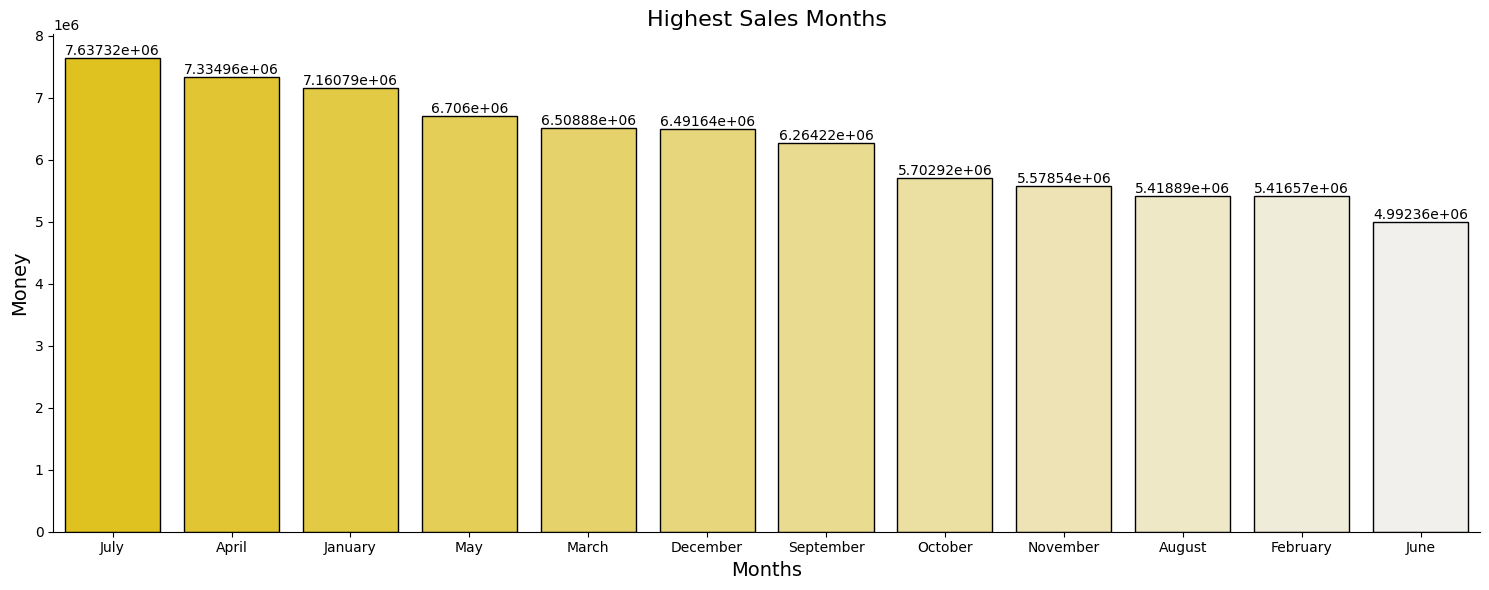

In [ ]:
plt.figure(figsize=(15,6))

flipkart_yellow_palette = sns.light_palette("#FFD700", n_colors=12, reverse=True)

high = df.groupby("months",as_index=False)["Total Sales (INR)"].sum().sort_values(by="Total Sales (INR)",ascending=False)
b = sns.barplot(x = 'months',y = "Total Sales (INR)",data = high,edgecolor = "black",palette = flipkart_yellow_palette,estimator=np.sum)

for i in b.containers:
  b.bar_label(i)

plt.title("Highest Sales Months", fontsize=16)
plt.xlabel("Months",fontsize = 14)
plt.ylabel("Money",fontsize = 14)

plt.tight_layout()
sns.despine()

plt.show()

In [ ]:
from IPython.display import display, HTML

html_form = """
<div style="font-family: Arial; padding: 20px; border: 2px solid #000000; border-radius: 10px; background-color: #ffffff; color: #000000; width: 90%">
  <h2 style="color: #000000;">Flipkart Sales Analysis Form</h2>

  <p><strong>1. Most Sold Products:</strong> Educational books, laptops, and smartwatches are the highest selling individual products.</p>

  <p><strong>2. Top Product Category:</strong> Electronics is the most sold category across all product types.</p>

  <p><strong>3. Preferred Payment Method:</strong> Among all payment modes, wallet transactions recorded the highest total amount, standing out even among other digital options.</p>

  <p><strong>4. Peak Sales Months:</strong> July records the highest sales, followed by April and January respectively.</p>
</div>
"""

display(HTML(html_form))
